In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , None)

In [5]:
df = pd.read_csv(r"C:\Users\Nii\Downloads\superstore.csv")

In [6]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Cleaning the Data

In [10]:
df = df.drop(["Country"] , axis = 1) #droping country column

In [11]:
pd.DataFrame(df.isnull().sum(),columns=['Number of missing values'])

,Number of missing values
Ship Mode,0
Segment,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0
Quantity,0


In [12]:
df.duplicated()
df.head(10)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [13]:
df.duplicated().sum()

17

In [14]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [15]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [16]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [17]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [18]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [19]:
data = df.drop_duplicates(keep='first')

In [20]:
dt = df.sort_values(by='Sales',ascending=False)

In [21]:
dt.head(10)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
9039,Standard Class,Consumer,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4098,Standard Class,Consumer,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
4277,Standard Class,Corporate,Lakewood,New Jersey,8701,East,Technology,Machines,9099.930,7,0.0,2365.9818
8488,Second Class,Consumer,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840
6425,Standard Class,Consumer,Philadelphia,Pennsylvania,19120,East,Technology,Copiers,8399.976,4,0.4,1119.9968


In [22]:
dt.shape

(9994, 12)

In [23]:
import plotly
import plotly.express as px
import plotly.offline as pyo
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [25]:
import cufflinks as cf##To bind plotly and pandas together.

In [26]:
from plotly.offline import init_notebook_mode,plot,iplot
pyo.init_notebook_mode(connected=True)#plotly connected to jupyter in offline mode
cf.go_offline()

In [27]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [28]:
px.bar(dt,x='Region',y='Sales') #Using Barchart

Calculating Z-Score Value

In [29]:
dt['z-score'] = (dt.Sales-dt.Sales.mean())/dt.Sales.std()

In [30]:
dt.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.954750
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.709952
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.094200
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.601598
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.478448


In [31]:
dt[dt['z-score']>3]
dt.head(10)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.954750
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.709952
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.094200
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.601598
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.478448
9039,Standard Class,Consumer,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700,15.504144
4098,Standard Class,Consumer,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755,14.793685
4277,Standard Class,Corporate,Lakewood,New Jersey,8701,East,Technology,Machines,9099.930,7,0.0,2365.9818,14.232077
8488,Second Class,Consumer,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840,13.670532
6425,Standard Class,Consumer,Philadelphia,Pennsylvania,19120,East,Technology,Copiers,8399.976,4,0.4,1119.9968,13.108997


In [32]:
dt.shape

(9994, 13)

In [33]:
dt[dt['z-score']<-3]

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score


In [34]:
dt[dt['z-score']<3].shape

(9867, 13)

Removing Outliers From the Dataset.

In [35]:
dt_no_outliers = dt[dt['z-score']<3]

In [36]:
dt_no_outliers.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
6467,Standard Class,Home Office,Providence,Rhode Island,2908,East,Office Supplies,Storage,2079.400,5,0.0,582.2320,2.967600
949,Standard Class,Home Office,Philadelphia,Pennsylvania,19120,East,Furniture,Tables,2065.320,12,0.4,-619.5960,2.945008
3628,Standard Class,Consumer,Seattle,Washington,98103,West,Office Supplies,Binders,2060.744,7,0.2,643.9825,2.937666
3043,Same Day,Home Office,Long Beach,California,90805,West,Furniture,Chairs,2054.272,8,0.2,256.7840,2.927282
8168,Standard Class,Home Office,Seattle,Washington,98105,West,Furniture,Tables,2036.860,7,0.0,366.6348,2.899344


In [37]:
new_dt = dt_no_outliers
new_dt.shape

(9867, 13)

HERE ARE OUTLIERS OBSERVED IN OUR DATA. NOW OUR DATA IS CLEAN.

In [38]:
#Scatter Plot BEFORE Removing Outliers
px.scatter(dt,x='Region',y='Sales',size='Sales')

In [39]:
px.scatter_matrix(new_dt,color='Region',title='Market',dimensions=['Sales', 'Quantity', 'Discount', 'Profit'])

C:\Users\Nii\AppData\Local\Temp\ipykernel_26388\1660335794.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Sales', ylabel='Density'>

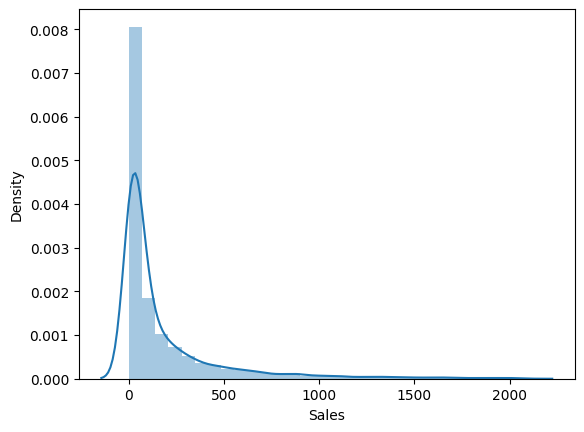

In [40]:
#Distribution Plots
sns.distplot(new_dt['Sales'],bins=30)

C:\Users\Nii\AppData\Local\Temp\ipykernel_26388\4229245031.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Discount', ylabel='Density'>

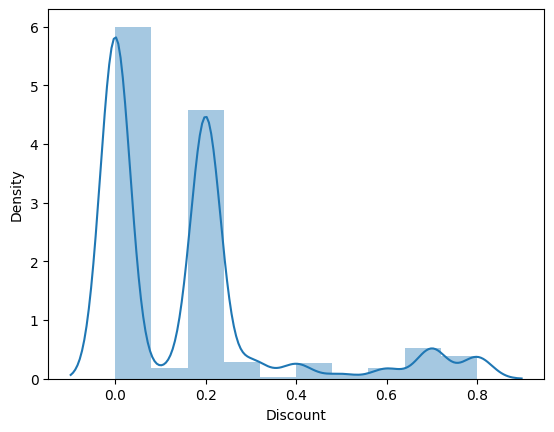

In [41]:
sns.distplot(new_dt['Discount'],bins=10)